In [1]:
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark import SparkConf
import os
import databricks.koalas as ks

In [3]:
#pip install koalas

#### Enable Arrow-based columnar data transfer

In [ ]:
#spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")

In [2]:
conf = SparkConf().setAppName("DanApp").setMaster("spark://172.25.0.101:7077")
sc = SparkContext(conf=conf)

In [3]:
spark = SparkSession.builder \
    .master("spark://172.25.0.101:7077") \
    .appName("DanApp") \
    .getOrCreate()

In [4]:
spark.getActiveSession()

In [19]:
#for root, dirs, files in os.walk("."):
#    for filename in files:
#        print(filename)

## Describing Dataset

In [5]:
os.getcwd()

'/home/jovyan/spark'

In [109]:
#Spark Dataframe

skdf_mig_italy = spark.read.format("csv").option("header", "true").option("inferSchema","true").load("/home/jovyan/spark/MIG_ITALY.csv")

In [110]:
print(type(skdf_mig_italy))

<class 'pyspark.sql.dataframe.DataFrame'>


In [116]:
skdf_mig_italy.show(2,truncate= True)

+---+----------------------------+---+--------------------+---+------+---+---------+----+----+-----+----------+-----+
|CO2|Country of birth/nationality|VAR|            Variable|GEN|Gender|COU|  Country| YEA|Year|Value|Flag Codes|Flags|
+---+----------------------------+---+--------------------+---+------+---+---------+----+----+-----+----------+-----+
|ITA|                       Italy|B11|Inflows of foreig...|TOT| Total|AUS|Australia|2000|2000|  299|      null| null|
|ITA|                       Italy|B11|Inflows of foreig...|TOT| Total|AUS|Australia|2001|2001|  400|      null| null|
+---+----------------------------+---+--------------------+---+------+---+---------+----+----+-----+----------+-----+
only showing top 2 rows



In [113]:
skdf_mig_italy.printSchema()

root
 |-- CO2: string (nullable = true)
 |-- Country of birth/nationality: string (nullable = true)
 |-- VAR: string (nullable = true)
 |-- Variable: string (nullable = true)
 |-- GEN: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- COU: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- YEA: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Value: integer (nullable = true)
 |-- Flag Codes: string (nullable = true)
 |-- Flags: string (nullable = true)



In [117]:
skdf_mig_italy.count()

2702

In [118]:
len(skdf_mig_italy.columns),skdf_mig_italy.columns

(13,
 ['CO2',
  'Country of birth/nationality',
  'VAR',
  'Variable',
  'GEN',
  'Gender',
  'COU',
  'Country',
  'YEA',
  'Year',
  'Value',
  'Flag Codes',
  'Flags'])

In [122]:
skdf_mig_italy.describe('Value').show()

+-------+------------------+
|summary|             Value|
+-------+------------------+
|  count|              2702|
|   mean|25439.251665433014|
| stddev|  83199.4019363038|
|    min|                 0|
|    max|            643530|
+-------+------------------+



In [127]:
skdf_mig_italy.select("Country" ,"Value").show(2)

+---------+-----+
|  Country|Value|
+---------+-----+
|Australia|  299|
|Australia|  400|
+---------+-----+
only showing top 2 rows



In [132]:
skdf_mig_italy.select("Variable").dropDuplicates().show(truncate= False)

+-----------------------------------------------------------+
|Variable                                                   |
+-----------------------------------------------------------+
|Stock of foreign population by nationality                 |
|Stock of foreign-born population by country of birth       |
|Outflows of foreign population by nationality              |
|Inflows of asylum seekers by nationality                   |
|Acquisition of nationality by country of former nationality|
|Inflows of foreign population by nationality               |
+-----------------------------------------------------------+



In [135]:
skdf_mig_italy.filter(skdf_mig_italy.Variable=="Acquisition of nationality by country of former nationality").count()

507

In [131]:
skdf_mig_italy.crosstab("Country","Year").show()

+---------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|   Country_Year|2000|2001|2002|2003|2004|2005|2006|2007|2008|2009|2010|2011|2012|2013|2014|2015|2016|2017|2018|2019|2020|
+---------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|         Poland|   2|   3|   2|   3|   2|   2|   2|   3|   4|   3|   3|   2|   3|   3|   3|   3|   3|   2|   3|   1|   0|
|     Luxembourg|   4|   4|   5|   4|   4|   4|   4|   4|   4|   4|   4|   5|   5|   5|   5|   5|   5|   5|   6|   3|   0|
|  United States|   4|   4|   4|   4|   4|   5|   5|   5|   5|   5|   5|   5|   5|   5|   5|   5|   5|   4|   3|   2|   0|
|         Greece|   2|   3|   2|   2|   2|   2|   2|   2|   2|   3|   4|   4|   4|   3|   4|   3|   3|   1|   2|   1|   0|
|          Japan|   0|   0|   0|   0|   0|   0|   2|   3|   3|   3|   3|   3|   4|   4|   4|   4|   4|   3|   3|   1|   0|
|          Spain

In [142]:
skdf_mig_italy.groupby('Country').agg({'Value': 'sum'}).collect()

[Row(Country='Sweden', sum(Value)=309147),
 Row(Country='Turkey', sum(Value)=44973),
 Row(Country='Germany', sum(Value)=18810323),
 Row(Country='France', sum(Value)=6271734),
 Row(Country='Greece', sum(Value)=73696),
 Row(Country='Belgium', sum(Value)=5905870),
 Row(Country='Finland', sum(Value)=71797),
 Row(Country='United States', sum(Value)=9192897),
 Row(Country='Chile', sum(Value)=13453),
 Row(Country='Italy', sum(Value)=0),
 Row(Country='Norway', sum(Value)=130627),
 Row(Country='Spain', sum(Value)=4854220),
 Row(Country='Denmark', sum(Value)=234891),
 Row(Country='Ireland', sum(Value)=56818),
 Row(Country='Iceland', sum(Value)=11826),
 Row(Country='Israel', sum(Value)=51761),
 Row(Country='Mexico', sum(Value)=92805),
 Row(Country='Estonia', sum(Value)=20432),
 Row(Country='Switzerland', sum(Value)=9038454),
 Row(Country='Latvia', sum(Value)=6895),
 Row(Country='Canada', sum(Value)=1162452),
 Row(Country='Czech Republic', sum(Value)=56931),
 Row(Country='Slovenia', sum(Value)=104

### Koala

In [10]:
kdf_mig_italy = ks.read_csv("/home/jovyan/spark/MIG_ITALY.csv")

In [11]:
type(kdf_mig_italy)

databricks.koalas.frame.DataFrame

In [57]:
kdf_mig_italy.Country.unique()

0              Sweden
1              Turkey
2             Germany
3              France
4              Greece
5             Belgium
6             Finland
7       United States
8               Chile
9               Italy
10             Norway
11              Spain
12            Denmark
13            Ireland
14            Iceland
15             Israel
16             Mexico
17            Estonia
18        Switzerland
19             Latvia
20             Canada
21     Czech Republic
22           Slovenia
23              Japan
24         Luxembourg
25        New Zealand
26             Poland
27           Portugal
28          Australia
29            Austria
30              Korea
31            Hungary
32     United Kingdom
33    Slovak Republic
34        Netherlands
Name: Country, dtype: object

In [13]:
kdf_mig_italy.info()

<class 'databricks.koalas.frame.DataFrame'>
Index: 2702 entries, 0 to 2701
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   CO2                           2702 non-null   object
 1   Country of birth/nationality  2702 non-null   object
 2   VAR                           2702 non-null   object
 3   Variable                      2702 non-null   object
 4   GEN                           2702 non-null   object
 5   Gender                        2702 non-null   object
 6   COU                           2702 non-null   object
 7   Country                       2702 non-null   object
 8   YEA                           2702 non-null   int32 
 9   Year                          2702 non-null   int32 
 10  Value                         2702 non-null   int32 
 11  Flag Codes                    0 non-null      object
 12  Flags                         0 non-null      object
dtypes: int32(3), obje

## Data Cleaning

In [87]:
# Koalas do not support pandas Categorical date type
kdf_mig_italy = kdf_mig_italy[["Country of birth/nationality","VAR","Variable","GEN","Gender","COU","Country","Year","Value"]]

# Converting to pandas because Plotly no support Koalas
pddf_mig_italy = kdf_mig_italy.to_pandas()
pddf_mig_italy["Rank"] = pddf_mig_italy["Value"].rank(method ='min') 


In [88]:
pddf_mig_italy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2702 entries, 0 to 2701
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country of birth/nationality  2702 non-null   object 
 1   VAR                           2702 non-null   object 
 2   Variable                      2702 non-null   object 
 3   GEN                           2702 non-null   object 
 4   Gender                        2702 non-null   object 
 5   COU                           2702 non-null   object 
 6   Country                       2702 non-null   object 
 7   Year                          2702 non-null   int32  
 8   Value                         2702 non-null   int32  
 9   Rank                          2702 non-null   float64
dtypes: float64(1), int32(2), object(7)
memory usage: 211.1+ KB


In [20]:
#pip install plotly-geo

### Plot

In [21]:
#import plotly as py
#pip install "notebook>=5.3" "ipywidgets>=7.5"

In [46]:
import plotly as py
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go

In [26]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

In [85]:
pddf_mig_italy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2702 entries, 0 to 2701
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country of birth/nationality  2702 non-null   object 
 1   VAR                           2702 non-null   object 
 2   Variable                      2702 non-null   object 
 3   GEN                           2702 non-null   object 
 4   Gender                        2702 non-null   object 
 5   COU                           2702 non-null   object 
 6   Country                       2702 non-null   object 
 7   Year                          2702 non-null   int32  
 8   Value                         2702 non-null   int32  
 9   Rank                          2702 non-null   float64
dtypes: float64(1), int32(2), object(7)
memory usage: 211.1+ KB


In [96]:
pddf_mig_italy.sort_values("Value",ascending = False).head(50)

,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,Year,Value,Rank
2079,Italy,B15,Stock of foreign population by nationality,TOT,Total,DEU,Germany,2019,643530,2702.0
2078,Italy,B15,Stock of foreign population by nationality,TOT,Total,DEU,Germany,2018,643065,2701.0
2061,Italy,B15,Stock of foreign population by nationality,TOT,Total,DEU,Germany,2001,619060,2700.0
2062,Italy,B15,Stock of foreign population by nationality,TOT,Total,DEU,Germany,2002,616282,2699.0
2060,Italy,B15,Stock of foreign population by nationality,TOT,Total,DEU,Germany,2000,615900,2698.0
2077,Italy,B15,Stock of foreign population by nationality,TOT,Total,DEU,Germany,2017,611450,2697.0
2063,Italy,B15,Stock of foreign population by nationality,TOT,Total,DEU,Germany,2003,609784,2696.0
2064,Italy,B15,Stock of foreign population by nationality,TOT,Total,DEU,Germany,2004,601258,2695.0
2076,Italy,B15,Stock of foreign population by nationality,TOT,Total,DEU,Germany,2016,596127,2694.0
2075,Italy,B15,Stock of foreign population by nationality,TOT,Total,DEU,Germany,2015,574530,2693.0


In [97]:
fig = go.Figure()
px.bar(pddf_mig_italy.query("Country == ('Germany','United States','France')")
        , x="Year", y="Value", color="Country")

#fig.add_trace(go.Scatter(x=pddf_mig_italy.Year, y=pddf_mig_italy.Value, 
#                         mode = 'lines',name='Test1'))
#fig.add_trace(go.Scatter(x=pddf_mig_italy.Year, y=pddf_mig_italy.Value, 
#                         name='Test2', line=dict(color='firebrick', width=2, dash='dashdot')))

In [103]:
fig = px.bar(pddf_mig_italy
        , x="Country", y="Value",color="Country")
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

### Geo Map

#### Filtering

In [17]:
kdf_mig_italy[kdf_mig_italy["Year"]==2019].groupby("Variable").sum()

,Year,Value
Variable,,
Stock of foreign population by nationality,44418,1538353
Stock of foreign-born population by country of birth,40380,1690888
Outflows of foreign population by nationality,6057,325
Inflows of asylum seekers by nationality,58551,193
Acquisition of nationality by country of former nationality,14133,6001
Inflows of foreign population by nationality,10095,3171


In [70]:
#pip install geopandas
#pip install mapclassify
#pip install descartes

In [93]:
pddf_mig_italy_2019 = kdf_mig_italy[(kdf_mig_italy["Variable"]=="Acquisition of nationality by country of former nationality") &
                                  (kdf_mig_italy["Year"]==2019)][["Country","Year","Value"]].to_pandas()

In [94]:
type(pddf_mig_italy_2019)

pandas.core.frame.DataFrame

In [20]:
import geopandas as gpd
import pandas as pd

In [31]:
world.count()

pop_est       176
continent     176
name          176
iso_a3        176
gdp_md_est    176
geometry      176
dtype: int64

In [32]:
pddf_mig_italy_2019.count()

Country    7
Year       7
Value      7
dtype: int64

In [65]:
world_italy_2019.groupby("Value").count()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,Year
Value,,,,,,,,
0.0,171,171,171,171,171,171,1,1
3.0,0,0,0,0,0,0,1,1
6.0,1,1,1,1,1,1,1,1
17.0,1,1,1,1,1,1,1,1
246.0,1,1,1,1,1,1,1,1
1254.0,1,1,1,1,1,1,1,1
4475.0,1,1,1,1,1,1,1,1


In [38]:
#world_italy_2019.head(5)

* Acquisition of nationality by country of former nationality of year 2019

In [95]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.name!="Antarctica")]
world_italy_2019 = pd.merge(world,
                        pddf_mig_italy_2019, 
                        how="outer", # "outer"  "right"
                        left_on=["name"], 
                        right_on=["Country"])
world_italy_2019['Value'] = world_italy_2019['Value'].fillna(0)

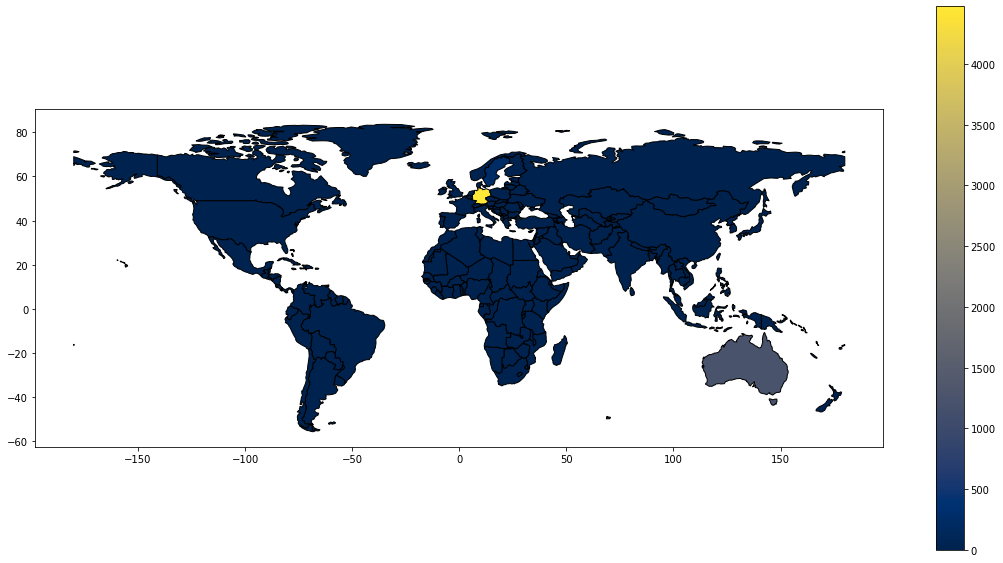

In [96]:
fig, ax = plt.subplots(1, 1, figsize=(19,10))

world_italy_2019.plot(column='Value',
                  ax=ax, 
                  edgecolor="black",
                  cmap='cividis',
                  legend=True,                     
                 );                  

In [5]:
world_italy_2019.plot(marker='*', color='green', markersize=5);

world_italy_2019 = world_italy_2019.to_crs(world.crs)

fig, ax = plt.subplots()

ax.set_aspect('equal')

world.plot(ax=ax, color='white', edgecolor='black')
world_italy_2019.plot(ax=ax, marker='o', color='red', markersize=5)
plt.show();

NameError: name 'world_italy_2019' is not defined

In [17]:
rdd = sc.parallelize([2,3,4])
print(type(rdd))
print(rdd.take(5))

<class 'pyspark.rdd.RDD'>
[2, 3, 4]


In [52]:
print(type(sc),"\n")
print(dir(sc),"\n")
print(sc.version,"\n")
sc.getConf().getAll()

<class 'pyspark.context.SparkContext'> 

['PACKAGE_EXTENSIONS', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getnewargs__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_accumulatorServer', '_active_spark_context', '_assert_on_driver', '_batchSize', '_callsite', '_checkpointFile', '_conf', '_dictToJavaMap', '_do_init', '_encryption_enabled', '_ensure_initialized', '_gateway', '_getJavaStorageLevel', '_initialize_context', '_javaAccumulator', '_jsc', '_jvm', '_lock', '_next_accum_id', '_pickled_broadcast_vars', '_python_includes', '_repr_html_', '_serialize_to_jvm', '_temp_dir', '_unbatched_serializer', 'accumulator', 'addFile', 'addPyFile', 'appName', 'applicationId', 'binaryFiles', 'binaryRecords', 'broadca

[('spark.app.name', 'DanApp'),
 ('spark.app.id', 'app-20210112100630-0002'),
 ('spark.master', 'spark://172.25.0.101:7077'),
 ('spark.driver.port', '37413'),
 ('spark.rdd.compress', 'True'),
 ('spark.driver.host', '99b27e601ea9'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.submit.pyFiles', ''),
 ('spark.executor.id', 'driver'),
 ('spark.submit.deployMode', 'client'),
 ('spark.ui.showConsoleProgress', 'true')]